Нас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы. Чтобы определиться с параметрами будущей модели, проведем разведывательный анализ данных и составим отчёт по его результатам. 


In [ ]:
Описание датасета
Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике


In [ ]:
Загрузим нужные библиотеки и наш датасет:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')

In [3]:
stud_math.columns   # Просмотрим названия колонок

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [4]:
stud_math.columns=stud_math.columns.str.lower()  #  Изменяем заголовки колонок так, чтобы там были только маленькие буквы.
recolumn={'studytime, granular':'studytime_granular'}  # Переименуем колонку 'studytime, granular' на более удобную
stud_math=stud_math.rename(columns=recolumn)           # Запишем изменения в датафрейм
display(stud_math.head(5))

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [ ]:
В данных есть пустые значения('NaN'), придется их заменять на 'None'.

Напишем функции для упрощения работы с однотипными операциями:

In [5]:
# Предобработка 

def value_counts(column):
    return pd.DataFrame(stud_math[[column]].value_counts())   # Смотрим значения в колонке

def raspred(column):
    return pd.DataFrame(stud_math[[column]].hist()), pd.DataFrame(stud_math[[column]].describe()) # Смотрим распределение в колонке

def iqr_grani(column):                                        # функция определения IQR и границ выбросов
    IQR = stud_math[column].quantile(0.75) - stud_math[column].quantile(0.25)     # Определяем межквартильный размах
    perc25 = stud_math[column].quantile(0.25)
    perc75 = stud_math[column].quantile(0.75)
 
    print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))  # Определяем границы выбросов и выводим 
                                                                                     # на экран все полученные данные 
    return 

def func_nan(column):
    stud_math[column] = stud_math[column].apply(lambda x: None if pd.isnull(x) else None if x == 'NaN' else x)   # заменим NAN на None
    return

In [ ]:
Рассмотрим столбцы по отдельности

# Посмотрим, сколько школ содержит наш датасет.

In [6]:
value_counts('school')

,0
school,
GP,349
MS,46


In [ ]:
В  датасете представлены 395 учеников из двух школ : GP и MS

# Сколько мальчиков и девочек в датасете

In [7]:
value_counts('sex')

,0
sex,
F,208
M,187


In [ ]:
В датасете 208 девочек и 187 мальчиков - практически равное количество


# Возраст исследуемых

In [8]:
value_counts('age')

,0
age,
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


In [ ]:
Как видим количество исследуемых с 20 до 21 года всего 5 человека, это очень мало и может отразится на дальнейшем исследовании
Для изучения исследуемых с 20 до 21 года не достаточно данных . 

In [ ]:
Посмотрим распределение в колонке 'age'

(                                      0
 0  AxesSubplot(0.125,0.125;0.775x0.755),
               age
 count  395.000000
 mean    16.696203
 std      1.276043
 min     15.000000
 25%     16.000000
 50%     17.000000
 75%     18.000000
 max     22.000000)

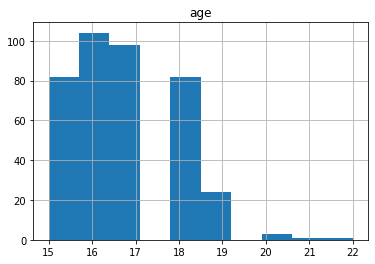

In [9]:
raspred('age')

In [ ]:
Основная часть исследуемых находится в возрасте от 15 до 19   
Посмотрим выбросы:

In [10]:
iqr_grani('age')

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


In [ ]:
Верхняя граница выбросов в колонке 21 год, отфильтруем значения выше 21

In [11]:
stud_math =stud_math.loc[stud_math.age <= 21]   # убираем учащихся старше 21 лет


# Тип адреса ученика

In [ ]:
Посмотрим где живут учащиеся:

In [12]:
func_nan('address')  # Сразу заменим NAN на None
value_counts('address')

,0
address,
U,294
R,83


In [ ]:
Вывод: 294 ученика живут в городе , 83 - за городом 

# Размер семьи

In [ ]:
Посмотрим в каких семьях живут учащиеся:

In [13]:
func_nan('famsize')  # Сразу заменим NAN на None 
value_counts('famsize')

,0
famsize,
GT3,260
LE3,107


In [ ]:
Вывод: у большинства учащихся в семье больше 3 человек.
  

# Совместное проживание родителей

In [14]:
func_nan('pstatus')  # Сразу заменим NAN на None 
value_counts('pstatus')

,0
pstatus,
T,313
A,36


In [ ]:
Вывод: большинство учащихся живет с обоими родителями, у 36 учащихся родители живут раздельно 
       

# Образование родителей

In [ ]:
Образование матери:

In [15]:
value_counts('medu')

,0
medu,
4.0,131
2.0,102
3.0,96
1.0,59
0.0,3


In [ ]:
Посмотрим распределение и определим границы выбросов:

(                                      0
 0  AxesSubplot(0.125,0.125;0.775x0.755),
              medu
 count  391.000000
 mean     2.749361
 std      1.099461
 min      0.000000
 25%      2.000000
 50%      3.000000
 75%      4.000000
 max      4.000000)

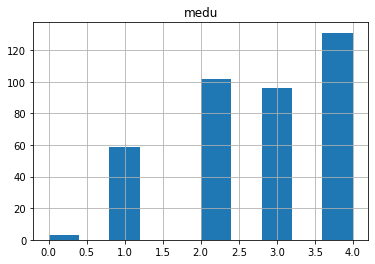

In [16]:
raspred('medu')

In [17]:
iqr_grani('medu')

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


In [ ]:
Выбросов нет.

In [ ]:
Образование отца:

In [18]:
value_counts('fedu') 

,0
fedu,
2.0,106
3.0,96
4.0,88
1.0,77
0.0,2
40.0,1


In [ ]:
В данных скорее всего закралась ошибка: значение 40.0 - отфильтруем его
Посмотрим наличие выбросов и распределение:

In [19]:
iqr_grani('fedu')

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


(                                      0
 0  AxesSubplot(0.125,0.125;0.775x0.755),
              fedu
 count  367.000000
 mean     2.531335
 std      1.073004
 min      1.000000
 25%      2.000000
 50%      3.000000
 75%      3.000000
 max      4.000000)

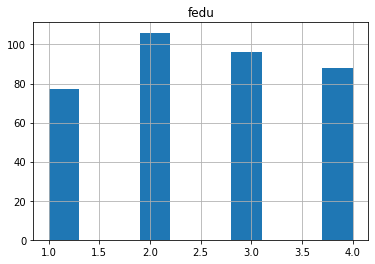

In [20]:
stud_math =stud_math.loc[stud_math.fedu <=4.5]
stud_math =stud_math.loc[stud_math.fedu >=0.5]
raspred('fedu')


In [ ]:
Вывод:  большая часть родителей имеют хорошее образование. 

# Работа родителей

In [ ]:
Выясним в каких сферах работают родители:

In [ ]:
Матери:

In [21]:
func_nan('mjob')   # Сразу заменим NAN на None
value_counts('mjob') 

,0
mjob,
other,124
services,89
at_home,57
teacher,47
health,31


In [ ]:
Отцы:

In [23]:
func_nan('fjob')   # Сразу заменим NAN на None
value_counts('fjob') 

,0
fjob,
other,187
services,93
teacher,26
at_home,14
health,13


In [ ]:
Вывод : большинство родителей заняты различной трудовой деятельностью, и лишь небольшая часть не работает 

# Причина выбора школы

In [ ]:
Выясним возможные причины выбора школы:

In [24]:
func_nan('reason')   # Сразу заменим NAN на None
value_counts('reason') 

,0
reason,
course,127
reputation,97
home,96
other,31


In [ ]:
Вывод: Образовательная программа послужила причиной выбора школы у 127 учащихся,
       но и репутация школы и близость к дому, 97 и 96 соответственно , не остались без внимания при выборе

# Наличие опекунов

In [25]:
func_nan('guardian')   # Сразу заменим NAN на None
value_counts('guardian')

,0
guardian,
mother,233
father,78
other,26


In [ ]:
Вывод :  значения данной колонки не внушают доверия, скорее всего здесь закралась ошибка

# Время пути до школы

In [ ]:
Оценим время пути до школы: 

In [26]:
value_counts('traveltime')

,0
traveltime,
1.0,224
2.0,90
3.0,21
4.0,7


In [ ]:
Посмотрим распределение значений:

(                                      0
 0  AxesSubplot(0.125,0.125;0.775x0.755),
        traveltime
 count  342.000000
 mean     1.447368
 std      0.703057
 min      1.000000
 25%      1.000000
 50%      1.000000
 75%      2.000000
 max      4.000000)

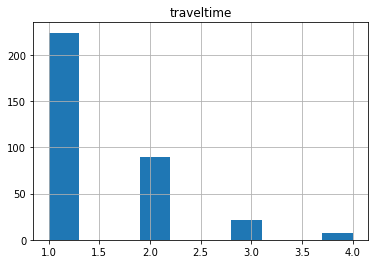

In [27]:
raspred('traveltime')

In [ ]:
Проверим выбросы и отфильтруем:

In [28]:
iqr_grani('traveltime')

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


In [ ]:
Отфильтруем значения выше верхней границы выбросов( 3.5)

In [29]:
stud_math =stud_math.loc[stud_math.traveltime <=3.5]

In [ ]:
Вывод: большинство учащихся проживает недалеко от школы

# Время на учёбу помимо школы в неделю

In [ ]:
Скорее всего это возможное время на учебу помимо школы

In [30]:
value_counts('studytime')

,0
studytime,
2.0,166
1.0,88
3.0,53
4.0,22


In [ ]:
Посмотрим распределение и выбросы:

In [31]:
iqr_grani('studytime')

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


(                                      0
 0  AxesSubplot(0.125,0.125;0.775x0.755),
         studytime
 count  329.000000
 mean     2.027356
 std      0.835117
 min      1.000000
 25%      1.000000
 50%      2.000000
 75%      2.000000
 max      4.000000)

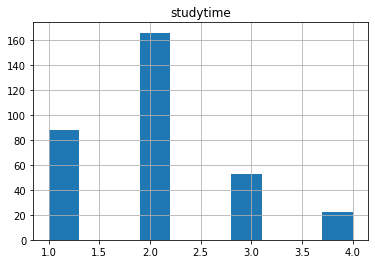

In [32]:
raspred('studytime')

In [ ]:
Отфильтруем выбросы:

In [33]:
stud_math =stud_math.loc[stud_math.studytime <=3.5]

In [ ]:
Вывод: у большинства учащихся возможное свободное время на учебу помимо школы не очень большое всего в пределах 5 часов
      

# Количество внеучебных неудач

In [34]:
value_counts('failures')

,0
failures,
0.0,230
1.0,41
2.0,12
3.0,11


In [ ]:
Вывод: основная масса учеников заняты только учебой

# Дополнительная образовательная поддержка

In [ ]:
Просмотрим данные:

In [35]:
func_nan('schoolsup')  # Сразу заменим NAN на None
value_counts('schoolsup')

,0
schoolsup,
no,261
yes,38


In [ ]:
Вывод: только 38 учащийся пользуется дополнительной образовательной поддержкой - это не много.

# Семейная образовательная поддержка

In [ ]:
Просмотрим данные:

In [36]:
func_nan('famsup')   # Сразу заменим NAN на None
value_counts('famsup')

,0
famsup,
yes,169
no,111


In [ ]:
Вывод: семейная образовательная поддержка есть больше чем у половины учеников.

# Дополнительные платные занятия по математике

In [ ]:
Просмотрим данные:

In [37]:
func_nan('paid')  # Сразу заменим NAN на None
value_counts('paid')

,0
paid,
no,158
yes,118


In [ ]:
Вывод: дополнительные платные занятия по математике берут 118 учащихся. Это не много.

# Дополнительные внеучебные занятия

In [ ]:
Просмотрим данные:

In [38]:
func_nan('activities')       # Сразу заменим NAN на None
value_counts('activities')

,0
activities,
no,149
yes,146


In [ ]:
Вывод: половина учащихся посещают внеучебные занятия

# Посещение детского сада

In [ ]:
Просмотрим данные:

In [39]:
func_nan('nursery')   # Сразу заменим NAN на None
value_counts('nursery')

,0
nursery,
yes,229
no,62


In [ ]:
Вывод: большинство учащихся посещало детский сад.

# Затрачиваемое время на учёбу помимо школы ,в неделю

In [ ]:
Скорее всего это фактическое затрачиваемое время на учебу помимо школы. Просмотрим данные:

In [40]:
value_counts('studytime_granular')

,0
studytime_granular,
-6.0,166
-3.0,88
-9.0,53


In [ ]:
Уберем минус перед значениями для удобства, так как в дальнейшем он будет мешать.

In [41]:
stud_math.studytime_granular = stud_math.studytime_granular.map(lambda x: str(x).lstrip('-')).astype(float) # уберем минус спереди
value_counts('studytime_granular')


,0
studytime_granular,
6.0,166
3.0,88
9.0,53


In [ ]:
Посмотрим распределение:

(                                      0
 0  AxesSubplot(0.125,0.125;0.775x0.755),
        studytime_granular
 count          307.000000
 mean             5.657980
 std              2.007411
 min              3.000000
 25%              3.000000
 50%              6.000000
 75%              6.000000
 max              9.000000)

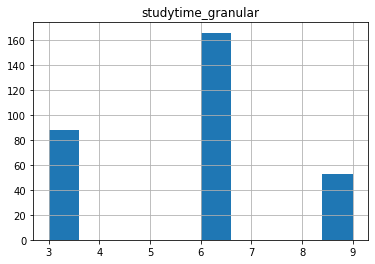

In [42]:
raspred('studytime_granular')

In [ ]:
Проверим выбросы:

In [43]:
iqr_grani('studytime_granular')

25-й перцентиль: 3.0, 75-й перцентиль: 6.0, IQR: 3.0,  Границы выбросов: [-1.5, 10.5].


In [ ]:
Вывод: выбросов нет, действительное затраченное время на учебу помимо школы у большинства больше планируемого (колонка 'studytime')

# Хотят получить высшее образование

In [ ]:
Просмотрим данные:

In [44]:
func_nan('higher')   # Сразу заменим NAN на None
value_counts('higher')

,0
higher,
yes,277
no,16


In [ ]:
Вывод: практически все учащиеся хотят получить высшее образование.

# Наличие интернета дома

In [ ]:
Просмотрим данные:

In [45]:
func_nan('internet')   # Сразу заменим NAN на None
value_counts('internet')

,0
internet,
yes,235
no,43


In [ ]:
Вывод: у большинства учащихся есть дома интернет, но эта колонка нам ни о чем не говорит так как интернет может быть и мобильным. 

# Романтические отношения

In [ ]:
Просмотрим данные:

In [46]:
func_nan('romantic')   # Сразу заменим NAN на None
value_counts('romantic')

,0
romantic,
no,188
yes,100


In [ ]:
Вывод: по крайне мере 100 учащихся в романтических отношениях .

# Отношения в семье

In [ ]:
Отношения в семье очень влияют на успеваемость в школе. Просмотрим данные:

In [48]:
value_counts('famrel')

,0
famrel,
4.0,146
5.0,73
3.0,48
2.0,14
1.0,4
-1.0,1


In [ ]:
Посмотрим распределение:

(                                      0
 0  AxesSubplot(0.125,0.125;0.775x0.755),
            famrel
 count  286.000000
 mean     3.930070
 std      0.911142
 min     -1.000000
 25%      4.000000
 50%      4.000000
 75%      5.000000
 max      5.000000)

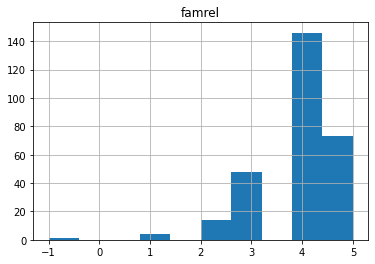

In [49]:
raspred('famrel')

In [ ]:
Проверим выбросы:

In [50]:
iqr_grani('famrel')

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].


In [ ]:
Oтфильтруем выбросы значений <2.5 ( по нижней границе выбросов):

In [52]:
stud_math =stud_math.loc[stud_math.famrel >2.5]

In [ ]:
Вывод: у большинства учащихся нормальные отношения в семье

# Свободное время после школы

In [ ]:
Просмотрим данные:

In [53]:
value_counts('freetime')

,0
freetime,
3.0,107
4.0,77
2.0,41
5.0,25
1.0,10


In [ ]:
Проверим распределение:

(                                      0
 0  AxesSubplot(0.125,0.125;0.775x0.755),
          freetime
 count  260.000000
 mean     3.253846
 std      0.965118
 min      1.000000
 25%      3.000000
 50%      3.000000
 75%      4.000000
 max      5.000000)

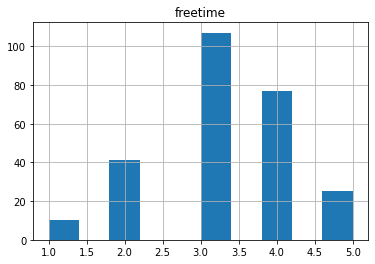

In [54]:
raspred('freetime')

In [ ]:
Наличие выбросов:

In [55]:
iqr_grani('freetime')

25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5].


In [ ]:
Удалим значения ниже нижней границы выбросов(1.5):

In [56]:
stud_math =stud_math.loc[stud_math.freetime >=1.5]

In [ ]:
Вывод: для занятий по математике у большинства учащихся много свободного времени после школы.

# Проведение времени с друзьями

In [ ]:
Просмотрим количество времени проводимое с друзьями:

In [57]:
value_counts('goout')

,0
goout,
3.0,88
4.0,58
2.0,57
5.0,28
1.0,13


In [ ]:
Вывод: учащиеся находят время для общения с друзьями

# Текущее состояние здоровья

In [ ]:
Просмотрим какое здоровье у учащихся в шолах:

In [58]:
value_counts('health')

,0
health,
5.0,85
3.0,58
4.0,40
2.0,32
1.0,28


In [ ]:
Проверим распределение:

(                                      0
 0  AxesSubplot(0.125,0.125;0.775x0.755),
            health
 count  243.000000
 mean     3.502058
 std      1.382818
 min      1.000000
 25%      3.000000
 50%      4.000000
 75%      5.000000
 max      5.000000)

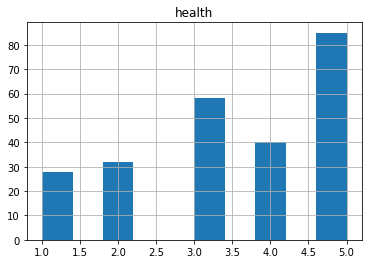

In [59]:
raspred('health')

In [ ]:
Проверим выбросы:

In [60]:
iqr_grani('health')

25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,  Границы выбросов: [0.0, 8.0].


In [ ]:
Вывод: выбросов нет, более половины учащихся имеют заболевания, и только 85 оценивают свое текущее здоровье как очень хорошее.

# Количество пропущенных занятий

In [ ]:
Чем больше пропускаешь тем больше не понятно и меньше шансов хорошо сдать экзамен. Просмотрим данные:

In [61]:
value_counts('absences')

,0
absences,
0.0,71
2.0,40
4.0,38
6.0,16
8.0,15
10.0,9
12.0,8
3.0,7
16.0,6


In [ ]:
Проверим распределение и границы выбросов:

In [62]:
iqr_grani('absences')

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


(                                      0
 0  AxesSubplot(0.125,0.125;0.775x0.755),
          absences
 count  241.000000
 mean     6.170124
 std     15.047428
 min      0.000000
 25%      0.000000
 50%      4.000000
 75%      8.000000
 max    212.000000)

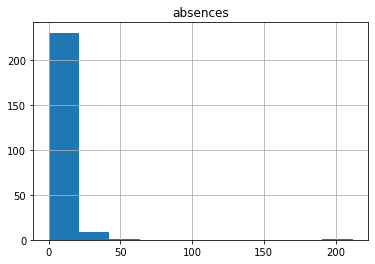

In [63]:
raspred('absences')

In [ ]:
Отфильтруем значения выше верхней границы выбросов (20)

In [64]:
stud_math =stud_math.loc[stud_math.absences <=20]  

In [ ]:
Вывод: в среднем учащиеся пропускают 6 занятий, но большинство стараются не пропускать

# Баллы по госэкзамену по математике

In [ ]:
Просмотрим данные по экзамену:

In [65]:
value_counts('score')

,0
score,
50.0,35
55.0,28
0.0,23
70.0,21
65.0,20
60.0,18
75.0,17
45.0,15
40.0,15


In [ ]:
Проверим распределение:

(                                      0
 0  AxesSubplot(0.125,0.125;0.775x0.755),
             score
 count  227.000000
 mean    51.431718
 std     22.322029
 min      0.000000
 25%     45.000000
 50%     55.000000
 75%     65.000000
 max     95.000000)

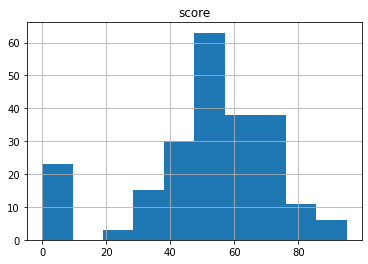

In [66]:
raspred('score')

In [ ]:
Проверим выбросы:

In [67]:
iqr_grani('score')

25-й перцентиль: 45.0, 75-й перцентиль: 65.0, IQR: 20.0,  Границы выбросов: [15.0, 95.0].


In [ ]:
Отфильтруем выбросы и посмотрим распределение еще раз:

(                                      0
 0  AxesSubplot(0.125,0.125;0.775x0.755),
             score
 count  204.000000
 mean    57.230392
 std     14.873882
 min     25.000000
 25%     50.000000
 50%     55.000000
 75%     70.000000
 max     95.000000)

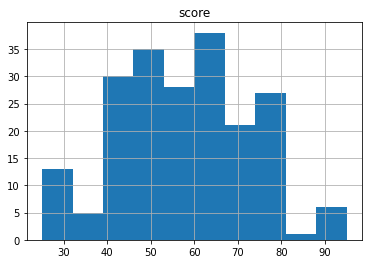

In [68]:
stud_math =stud_math.loc[stud_math.score <=95]
stud_math =stud_math.loc[stud_math.score >=15]
raspred('score')

# Корреляционный анализ

In [ ]:
Используем для наглядности матрицу корреляций:

In [69]:
stud_math.corr()

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.166959,-0.181593,0.141734,0.064739,0.260841,0.064739,-0.028792,-0.023811,0.087120,0.001356,0.143687,-0.155147
medu,-0.166959,1.000000,0.655641,-0.081700,0.116046,-0.184335,0.116046,0.157646,-0.007490,0.062415,-0.013682,0.112762,0.186221
fedu,-0.181593,0.655641,1.000000,-0.062316,0.054237,-0.270591,0.054237,0.048767,-0.074914,0.011124,0.012937,0.020126,0.169255
traveltime,0.141734,-0.081700,-0.062316,1.000000,-0.150599,0.031292,-0.150599,-0.085829,-0.009407,-0.079079,0.004216,-0.112813,-0.050830
studytime,0.064739,0.116046,0.054237,-0.150599,1.000000,-0.068921,1.000000,0.082952,-0.100710,0.011479,-0.072869,-0.087763,0.101956
failures,0.260841,-0.184335,-0.270591,0.031292,-0.068921,1.000000,-0.068921,0.021612,0.223141,-0.010194,0.133052,0.165418,-0.232778
studytime_granular,0.064739,0.116046,0.054237,-0.150599,1.000000,-0.068921,1.000000,0.082952,-0.100710,0.011479,-0.072869,-0.087763,0.101956
famrel,-0.028792,0.157646,0.048767,-0.085829,0.082952,0.021612,0.082952,1.000000,0.168059,0.008046,0.031254,0.023319,0.117738
freetime,-0.023811,-0.007490,-0.074914,-0.009407,-0.100710,0.223141,-0.100710,0.168059,1.000000,0.165371,0.085444,0.077133,0.019786
goout,0.087120,0.062415,0.011124,-0.079079,0.011479,-0.010194,0.011479,0.008046,0.165371,1.000000,0.047755,0.089578,-0.205822


In [ ]:
Оставим слабоскоррелированные  со 'score' переменные это age,traveltime,failures,goout,absences.
Получается что результат экзамена практически не зависит от возраста, времени пути до школы, внеучебных неудач, времени проведенного
с друзьями и количества пропущенных уроков. Хотя с количеством пропущенных уроков не очень понятно.

# Анализ номинативных переменных

In [ ]:
Просмотрим остальные номинативные переменные:

In [70]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

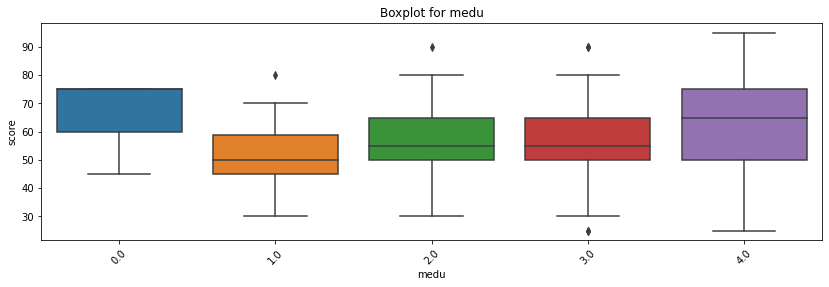

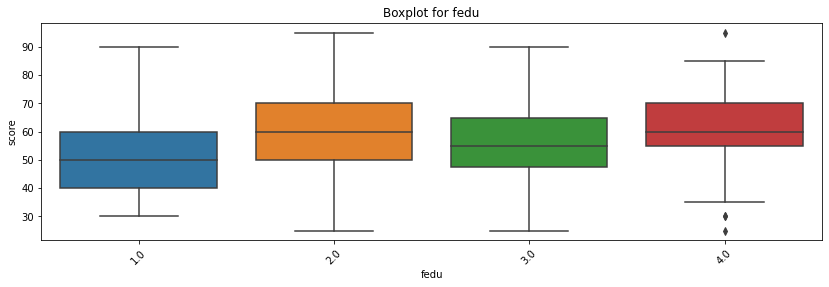

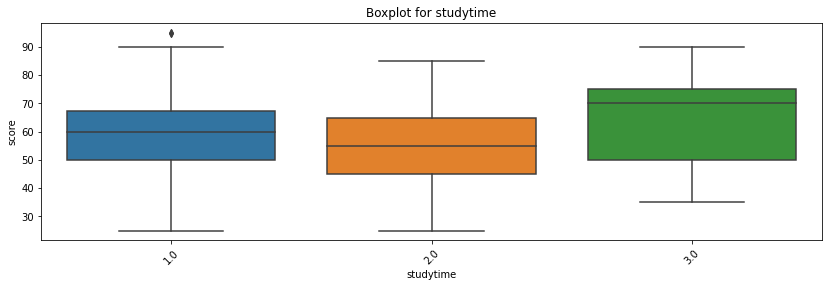

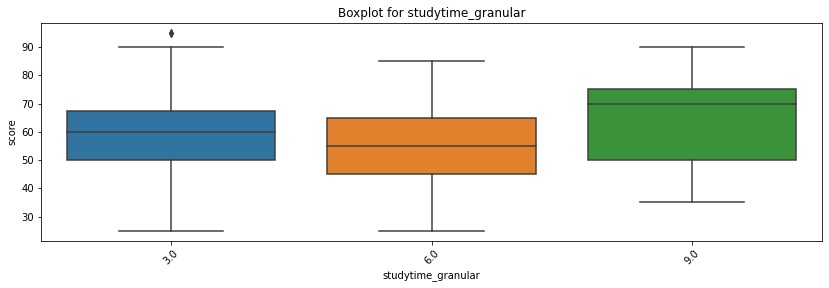

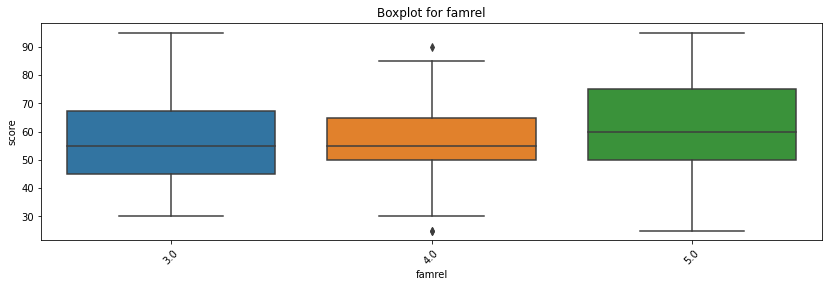

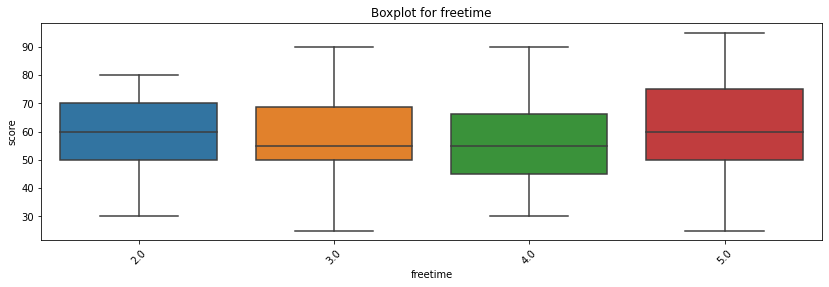

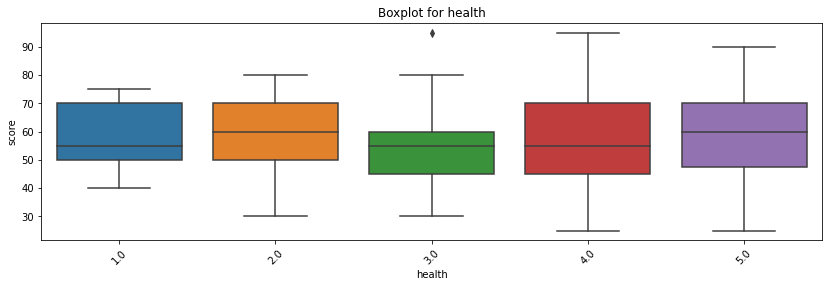

In [71]:
for col in ['medu', 'fedu', 'studytime', 'studytime_granular', 'famrel', 'freetime', 'health']:
    get_boxplot(col)

In [ ]:
Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента.
Проверим нулевую гипотезу о том, результаты экзаменов по различным параметрам неразличимы:

In [72]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [73]:
for col in ['medu', 'fedu', 'studytime', 'studytime_granular', 'famrel', 'freetime', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки fedu
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки studytime_granular
Найдены статистически значимые различия для колонки famrel


Серьёзно отличаются пять параметров: medu, fedu, studytime, studytime_granular и famrel. Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на результаты экзаменов, это: medu, fedu, studytime, studytime_granularб, famrel, freetime, health.

In [74]:
stud_math_for_model = stud_math.loc[:, ['medu', 'fedu', 'studytime', 'studytime_granular', 'famrel', 'freetime', 'health']]
stud_math_for_model.head()

,medu,fedu,studytime,studytime_granular,famrel,freetime,health
0,4.0,4.0,2.0,6.0,4.0,3.0,3.0
1,1.0,1.0,2.0,6.0,5.0,3.0,3.0
2,1.0,1.0,2.0,6.0,4.0,3.0,3.0
3,4.0,2.0,3.0,9.0,3.0,2.0,5.0
4,3.0,3.0,2.0,6.0,4.0,3.0,5.0


# Выводы

Итак, в результате EDA для анализа влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска получены следующие выводы:

In [ ]:
В данных достаточно мало пустых значений, но они все же есть.
Выбросы найдены практически во всех столбцах с числовыми значениями, учитывая пропуски, можно сказать что данные не достаточно чистые.

Исследуемые данные не одного формата. Например : 
    где то пятибальная шкала ответов - 1-5,
    где то - "да" и "нет",
    где то просто числовое значение или варианты ответов из списка.
Скорее всего именно поэтому в итоговую модель попали только 7 однотипных по формату ответов параметров.
Для более точного исследования необходимо что бы ответы на исследуемые параметры были одного формата.

Параметры, которые предлагается использовать в дальнейшем для построения модели, это:
medu, fedu, studytime, studytime_granularб, famrel, freetime, health.

